# 02.Analisis Exploratorio

## Importacion de los datos

### Historico del Bitcoin

In [1]:
import pandas as pd
import numpy as np
df_btc=pd.read_csv("../Datos/btc_USD_historic.csv")
df_btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1088 entries, 0 to 1087
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1088 non-null   object 
 1   Close   1088 non-null   float64
 2   High    1088 non-null   float64
 3   Low     1088 non-null   float64
 4   Open    1088 non-null   float64
 5   Volume  1088 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 51.1+ KB


###  Convertir a variables numericas

In [2]:
columnas_numericas = df_btc.columns.values[1:]
print(columnas_numericas)
df_btc[columnas_numericas] = df_btc[columnas_numericas].apply(pd.to_numeric, errors='coerce')
df_btc['Date'] = pd.to_datetime(df_btc['Date'], format='%Y-%m-%d')
df_btc.info()

['Close' 'High' 'Low' 'Open' 'Volume']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1088 entries, 0 to 1087
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1088 non-null   datetime64[ns]
 1   Close   1088 non-null   float64       
 2   High    1088 non-null   float64       
 3   Low     1088 non-null   float64       
 4   Open    1088 non-null   float64       
 5   Volume  1088 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 51.1 KB


### Hallar las medidas mas importantes en los ultimos 7 dias

In [3]:
print(df_btc.describe())
df_btc['Close_7d'] = df_btc['Close'].rolling(window=7).mean()
df_btc['Volume_7d'] = df_btc['Volume'].rolling(window=7).mean()
std = df_btc['Close'].std()
mean = df_btc['Close'].mean()
outliers = df_btc[np.abs(df_btc['Close'] - mean) > 3 * std]
print(f"outliers: {outliers}")
print(f"mean: {mean}")
print(f"std: {std}")

                      Date          Close           High            Low  \
count                 1088    1088.000000    1088.000000    1088.000000   
mean   2023-10-15 12:00:00   45722.120934   46569.463702   44780.068205   
min    2022-04-20 00:00:00   15787.284180   16253.047852   15599.046875   
25%    2023-01-16 18:00:00   24533.289551   25135.221680   24204.785645   
50%    2023-10-15 12:00:00   34987.806641   35313.183594   34286.132812   
75%    2024-07-13 06:00:00   65020.118164   66411.380859   63341.731445   
max    2025-04-11 00:00:00  106146.265625  109114.882812  105291.734375   
std                    NaN   25661.540541   26185.790097   25050.699983   

                Open        Volume  
count    1088.000000  1.088000e+03  
mean    45683.809947  3.021347e+10  
min     15782.300781  5.331173e+09  
25%     24533.327148  1.715140e+10  
50%     34993.630859  2.627770e+10  
75%     64968.426758  3.680654e+10  
max    106147.296875  1.492189e+11  
std     25637.180831  1.9108

### Principales noticias News API

In [4]:
import pandas as pd
import numpy as np
df_news=pd.read_csv("C:/Repos/Projecto_TRM/Datos/noticias_bitcoin_top3_diarias.csv")
df_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   fecha        323 non-null    object
 1   titulo       323 non-null    object
 2   descripcion  323 non-null    object
 3   contenido    323 non-null    object
 4   url          323 non-null    object
 5   fuente       323 non-null    object
dtypes: object(6)
memory usage: 15.3+ KB


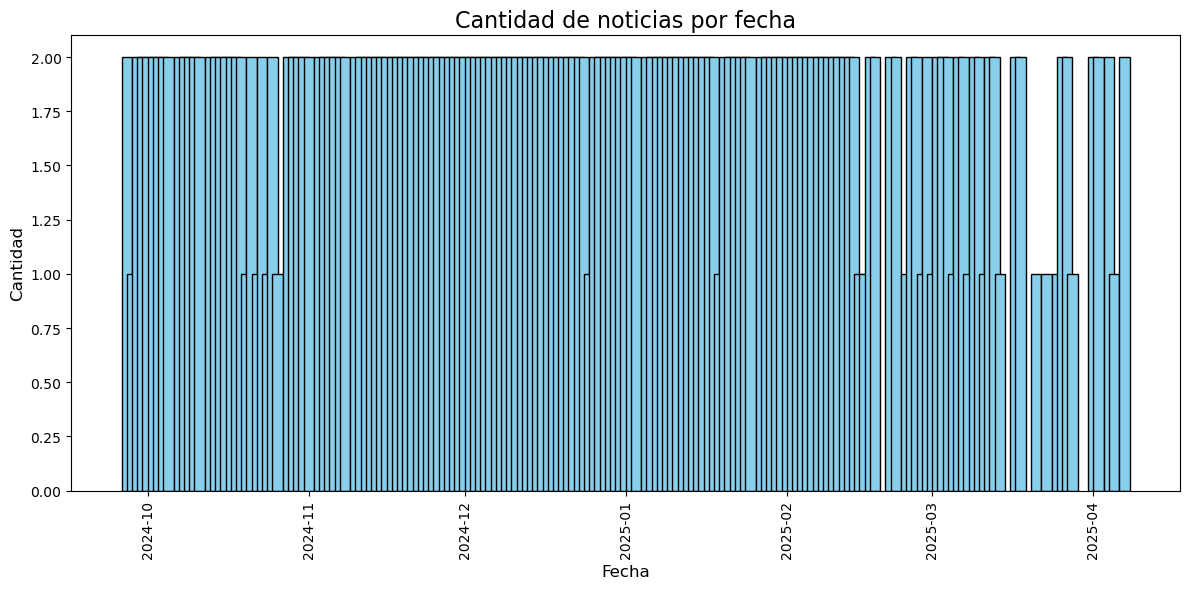

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.dates import MonthLocator, DateFormatter

# Asegurarse de que 'fecha' sea datetime
df_news['fecha'] = pd.to_datetime(df_news['fecha'])

# Contar valores por fecha
conteo_fechas = df_news['fecha'].value_counts().sort_index()

# Convertir a DataFrame
df_plot = conteo_fechas.reset_index()
df_plot.columns = ['fecha', 'cantidad']

# Crear gráfico con fechas como eje X real
plt.figure(figsize=(12, 6))
plt.bar(df_plot['fecha'], df_plot['cantidad'], color='skyblue', width=2,edgecolor='black')

# Formatear eje X para mostrar una etiqueta por mes
ax = plt.gca()
ax.xaxis.set_major_locator(MonthLocator(interval=1))
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m'))

plt.title('Cantidad de noticias por fecha', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


# 04. Visualizacion de Datos

In [8]:
import plotly.express as px
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_btc['Date'], y=df_btc['Close'], mode='lines', name='BTC USD diario'))
fig.add_trace(go.Scatter(x=df_btc['Date'], y=df_btc['Close_7d'], mode='lines', name='Media Móvil', line=dict(dash='dash')))

# Agregar título y etiquetas opcionales
fig.update_layout(
    title='Precio de Bitcoin y Media Móvil de 7 Días',
    xaxis_title='Fecha',
    title_x=0.5,
    yaxis_title='Precio USD',
    yaxis=dict(tickformat=',.2f')  # separador de miles y 2 decimales
)
fig.show()
# Crear una nueva figura para el volumen
fig_volume = go.Figure()
fig_volume.add_trace(go.Scatter(x=df_btc['Date'], y=df_btc['Volume'], mode='lines', name='Volumen'))
fig_volume.add_trace(go.Scatter(x=df_btc['Date'], y=df_btc['Volume_7d'], mode='lines', name='Media Móvil', line=dict(dash='dash')))

# Agregar título y etiquetas opcionales
fig_volume.update_layout(
    title='Volumen de Bitcoin',
    xaxis_title='Fecha',
    title_x=0.5,
    yaxis_title='Volumen',
    yaxis=dict(tickformat=',.2f')  # separador de miles y 2 decimales
)

fig_volume.show()



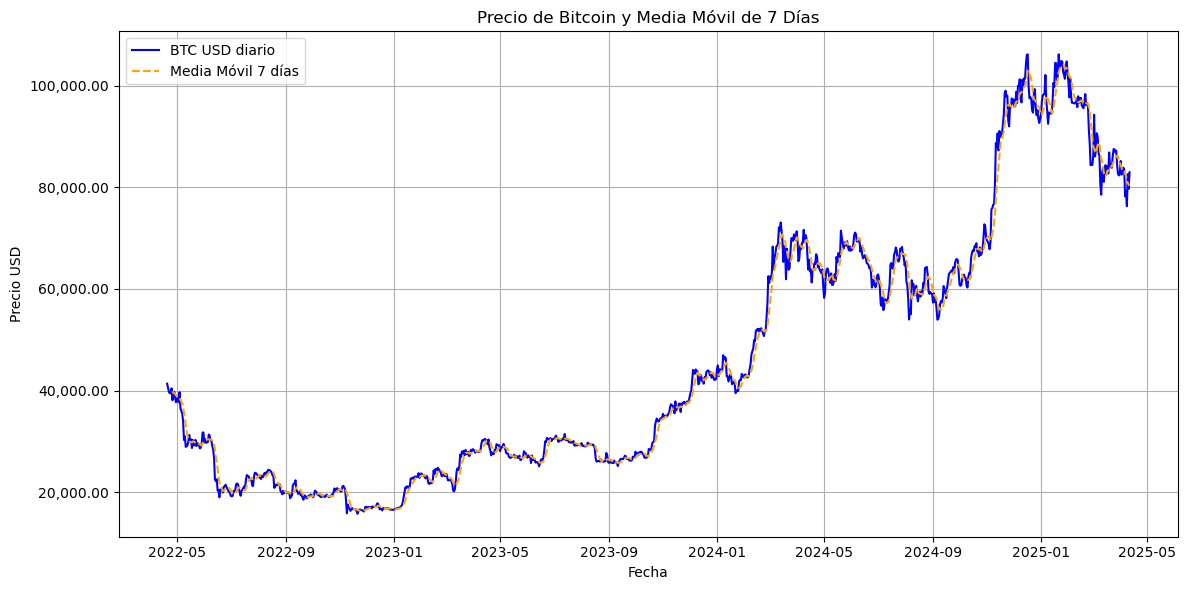

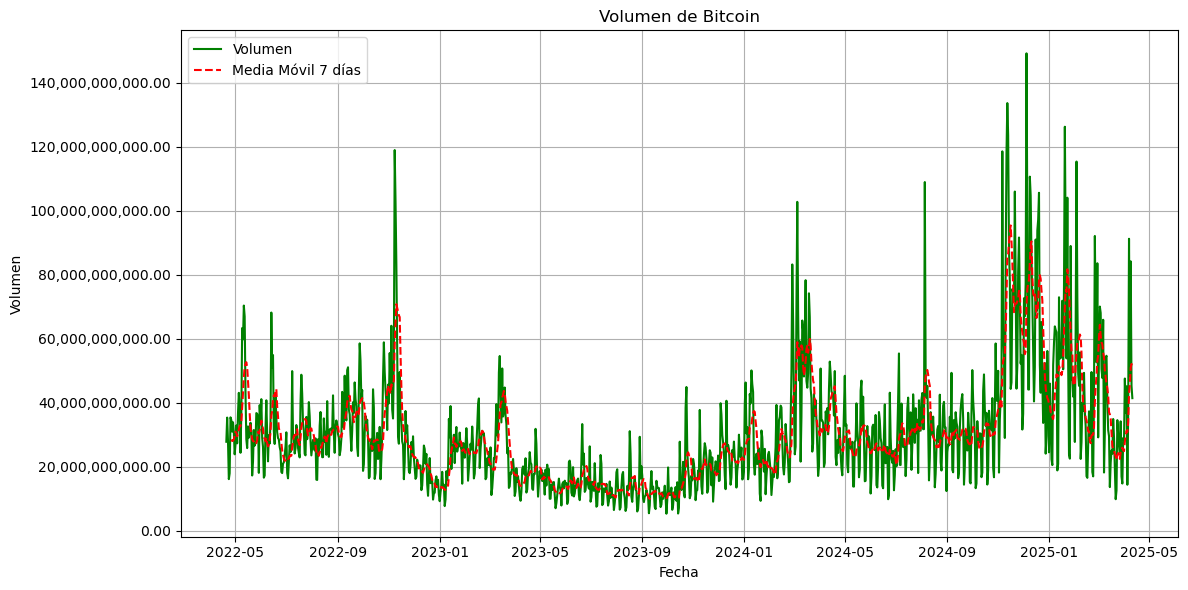

In [9]:
import matplotlib.pyplot as plt

# Asegúrate de que 'Date' esté en formato datetime si aún no lo está
df_btc['Date'] = pd.to_datetime(df_btc['Date'])

# Gráfico de precios
plt.figure(figsize=(12, 6))
plt.plot(df_btc['Date'], df_btc['Close'], label='BTC USD diario', color='blue')
plt.plot(df_btc['Date'], df_btc['Close_7d'], label='Media Móvil 7 días', linestyle='--', color='orange')
plt.title('Precio de Bitcoin y Media Móvil de 7 Días')
plt.xlabel('Fecha')
plt.ylabel('Precio USD')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.2f}'))  # Formato con miles y 2 decimales
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Gráfico de volumen
plt.figure(figsize=(12, 6))
plt.plot(df_btc['Date'], df_btc['Volume'], label='Volumen', color='green')
plt.plot(df_btc['Date'], df_btc['Volume_7d'], label='Media Móvil 7 días', linestyle='--', color='red')
plt.title('Volumen de Bitcoin')
plt.xlabel('Fecha')
plt.ylabel('Volumen')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.2f}'))  # Formato con miles y 2 decimales
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Exportar data frame con la media movil

In [ ]:
df_btc.to_csv('../Datos/BTC_USD_Media_Movil.csv', index=False)